## Work
1. 請建立自己的deep neural network
2. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
3. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [3]:
import os
from tensorflow import keras
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [4]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [5]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [7]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=128, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=512, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

    return model
model = build_mlp()

In [8]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.RMSprop(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 563,082
Trainable params: 563,082
Non-trainable params: 0
_________________________________________________________________


In [9]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 1s 7ms/step - loss: 2.0976 - accuracy: 0.2350 - val_loss: 2.0311 - val_accuracy: 0.2530
Epoch 2/500
196/196 [==============================] - 1s 6ms/step - loss: 1.8692 - accuracy: 0.3240 - val_loss: 1.8679 - val_accuracy: 0.3174
Epoch 3/500
196/196 [==============================] - 1s 6ms/step - loss: 1.7774 - accuracy: 0.3595 - val_loss: 1.7259 - val_accuracy: 0.3696
Epoch 4/500
196/196 [==============================] - 6s 31ms/step - loss: 1.7201 - accuracy: 0.3835 - val_loss: 1.7377 - val_accuracy: 0.3702
Epoch 5/500
196/196 [==============================] - 1s 6ms/step - loss: 1.6607 - accuracy: 0.4043 - val_loss: 1.7731 - val_accuracy: 0.3652
Epoch 6/500
196/196 [==============================] - 1s 5ms/step - loss: 1.6143 - accuracy: 0.4219 - val_loss: 1.6943 - val_accuracy: 0.3870
Epoch 7/500
196/196 [==============================] - 1s 5ms/step - loss: 1.5758 - accuracy: 0.4348 - val_loss: 1.6350 - val_accuracy: 0.415

Epoch 58/500
196/196 [==============================] - 1s 5ms/step - loss: 0.6006 - accuracy: 0.7820 - val_loss: 2.4719 - val_accuracy: 0.4546
Epoch 59/500
196/196 [==============================] - 1s 5ms/step - loss: 0.5904 - accuracy: 0.7876 - val_loss: 2.4971 - val_accuracy: 0.4491
Epoch 60/500
196/196 [==============================] - 1s 5ms/step - loss: 0.5871 - accuracy: 0.7872 - val_loss: 2.6928 - val_accuracy: 0.4382
Epoch 61/500
196/196 [==============================] - 1s 5ms/step - loss: 0.5717 - accuracy: 0.7916 - val_loss: 2.5736 - val_accuracy: 0.4593
Epoch 62/500
196/196 [==============================] - 1s 5ms/step - loss: 0.5659 - accuracy: 0.7950 - val_loss: 2.6310 - val_accuracy: 0.4525
Epoch 63/500
196/196 [==============================] - 1s 5ms/step - loss: 0.5503 - accuracy: 0.8018 - val_loss: 2.6777 - val_accuracy: 0.4512
Epoch 64/500
196/196 [==============================] - 1s 5ms/step - loss: 0.5471 - accuracy: 0.8041 - val_loss: 2.7543 - val_accuracy:

Epoch 115/500
196/196 [==============================] - 1s 5ms/step - loss: 0.2869 - accuracy: 0.9012 - val_loss: 5.0959 - val_accuracy: 0.4382
Epoch 116/500
196/196 [==============================] - 1s 5ms/step - loss: 0.2960 - accuracy: 0.8987 - val_loss: 5.0646 - val_accuracy: 0.4462
Epoch 117/500
196/196 [==============================] - 1s 5ms/step - loss: 0.2865 - accuracy: 0.9022 - val_loss: 5.1787 - val_accuracy: 0.4534
Epoch 118/500
196/196 [==============================] - 1s 5ms/step - loss: 0.2760 - accuracy: 0.9034 - val_loss: 5.2497 - val_accuracy: 0.4394
Epoch 119/500
196/196 [==============================] - 1s 5ms/step - loss: 0.2786 - accuracy: 0.9066 - val_loss: 5.5161 - val_accuracy: 0.4436
Epoch 120/500
196/196 [==============================] - 1s 5ms/step - loss: 0.2848 - accuracy: 0.9046 - val_loss: 5.5863 - val_accuracy: 0.4378
Epoch 121/500
196/196 [==============================] - 1s 5ms/step - loss: 0.2786 - accuracy: 0.9051 - val_loss: 5.5162 - val_ac

196/196 [==============================] - 2s 8ms/step - loss: 0.2285 - accuracy: 0.9297 - val_loss: 7.5862 - val_accuracy: 0.4404
Epoch 172/500
196/196 [==============================] - 2s 11ms/step - loss: 0.2154 - accuracy: 0.9324 - val_loss: 7.8346 - val_accuracy: 0.4423
Epoch 173/500
196/196 [==============================] - 1s 5ms/step - loss: 0.2113 - accuracy: 0.9337 - val_loss: 7.6696 - val_accuracy: 0.4553
Epoch 174/500
196/196 [==============================] - 1s 6ms/step - loss: 0.2177 - accuracy: 0.9335 - val_loss: 7.8201 - val_accuracy: 0.4410
Epoch 175/500
196/196 [==============================] - 18s 93ms/step - loss: 0.2192 - accuracy: 0.9334 - val_loss: 8.3967 - val_accuracy: 0.4407
Epoch 176/500
196/196 [==============================] - 1s 5ms/step - loss: 0.2188 - accuracy: 0.9351 - val_loss: 7.9439 - val_accuracy: 0.4372
Epoch 177/500
196/196 [==============================] - 1s 5ms/step - loss: 0.2152 - accuracy: 0.9356 - val_loss: 8.0724 - val_accuracy: 0.4

196/196 [==============================] - 1s 5ms/step - loss: 0.2083 - accuracy: 0.9440 - val_loss: 10.0094 - val_accuracy: 0.4487
Epoch 228/500
196/196 [==============================] - 1s 7ms/step - loss: 0.2014 - accuracy: 0.9440 - val_loss: 10.9530 - val_accuracy: 0.4307
Epoch 229/500
196/196 [==============================] - 1s 5ms/step - loss: 0.2002 - accuracy: 0.9455 - val_loss: 10.4459 - val_accuracy: 0.4227
Epoch 230/500
196/196 [==============================] - 1s 5ms/step - loss: 0.2036 - accuracy: 0.9441 - val_loss: 9.9956 - val_accuracy: 0.4474
Epoch 231/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1971 - accuracy: 0.9449 - val_loss: 10.1475 - val_accuracy: 0.4455
Epoch 232/500
196/196 [==============================] - 1s 5ms/step - loss: 0.2027 - accuracy: 0.9448 - val_loss: 9.9523 - val_accuracy: 0.4507
Epoch 233/500
196/196 [==============================] - 1s 5ms/step - loss: 0.2013 - accuracy: 0.9457 - val_loss: 9.9195 - val_accuracy: 0.

196/196 [==============================] - 1s 5ms/step - loss: 0.1859 - accuracy: 0.9538 - val_loss: 12.4542 - val_accuracy: 0.4535
Epoch 284/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1975 - accuracy: 0.9502 - val_loss: 12.2508 - val_accuracy: 0.4355
Epoch 285/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1887 - accuracy: 0.9532 - val_loss: 12.9818 - val_accuracy: 0.4409
Epoch 286/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1961 - accuracy: 0.9514 - val_loss: 12.4016 - val_accuracy: 0.4389
Epoch 287/500
196/196 [==============================] - 1s 6ms/step - loss: 0.1965 - accuracy: 0.9534 - val_loss: 12.5270 - val_accuracy: 0.4449
Epoch 288/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1896 - accuracy: 0.9533 - val_loss: 12.3877 - val_accuracy: 0.4506
Epoch 289/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1944 - accuracy: 0.9522 - val_loss: 12.5868 - val_accuracy:

196/196 [==============================] - 1s 5ms/step - loss: 0.2007 - accuracy: 0.9571 - val_loss: 14.4713 - val_accuracy: 0.4532
Epoch 340/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1948 - accuracy: 0.9568 - val_loss: 15.0104 - val_accuracy: 0.4485
Epoch 341/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1939 - accuracy: 0.9562 - val_loss: 15.0772 - val_accuracy: 0.4333
Epoch 342/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1948 - accuracy: 0.9577 - val_loss: 14.7043 - val_accuracy: 0.4538
Epoch 343/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1820 - accuracy: 0.9583 - val_loss: 14.5605 - val_accuracy: 0.4436
Epoch 344/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1877 - accuracy: 0.9591 - val_loss: 14.9708 - val_accuracy: 0.4499
Epoch 345/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1919 - accuracy: 0.9572 - val_loss: 14.6211 - val_accuracy:

196/196 [==============================] - 1s 5ms/step - loss: 0.1949 - accuracy: 0.9605 - val_loss: 16.6306 - val_accuracy: 0.4443
Epoch 396/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1930 - accuracy: 0.9611 - val_loss: 17.7579 - val_accuracy: 0.4303
Epoch 397/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1902 - accuracy: 0.9610 - val_loss: 16.8256 - val_accuracy: 0.4478
Epoch 398/500
196/196 [==============================] - 1s 6ms/step - loss: 0.1886 - accuracy: 0.9621 - val_loss: 16.6608 - val_accuracy: 0.4434
Epoch 399/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1867 - accuracy: 0.9614 - val_loss: 17.6061 - val_accuracy: 0.4463
Epoch 400/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1811 - accuracy: 0.9636 - val_loss: 17.5517 - val_accuracy: 0.4518
Epoch 401/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1862 - accuracy: 0.9619 - val_loss: 17.1136 - val_accuracy:

196/196 [==============================] - 1s 5ms/step - loss: 0.1962 - accuracy: 0.9638 - val_loss: 19.2712 - val_accuracy: 0.4418
Epoch 452/500
196/196 [==============================] - 1s 6ms/step - loss: 0.1764 - accuracy: 0.9657 - val_loss: 18.7187 - val_accuracy: 0.4555
Epoch 453/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1899 - accuracy: 0.9642 - val_loss: 19.3692 - val_accuracy: 0.4428
Epoch 454/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1869 - accuracy: 0.9637 - val_loss: 19.0112 - val_accuracy: 0.4524
Epoch 455/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1910 - accuracy: 0.9638 - val_loss: 19.1117 - val_accuracy: 0.4243
Epoch 456/500
196/196 [==============================] - 14s 69ms/step - loss: 0.2027 - accuracy: 0.9632 - val_loss: 19.8059 - val_accuracy: 0.4360
Epoch 457/500
196/196 [==============================] - 1s 5ms/step - loss: 0.1920 - accuracy: 0.9644 - val_loss: 19.9271 - val_accurac

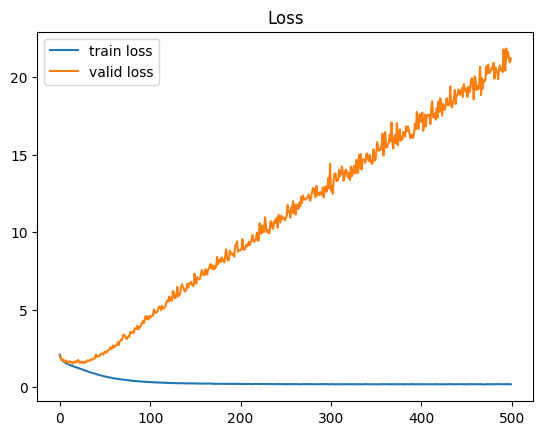

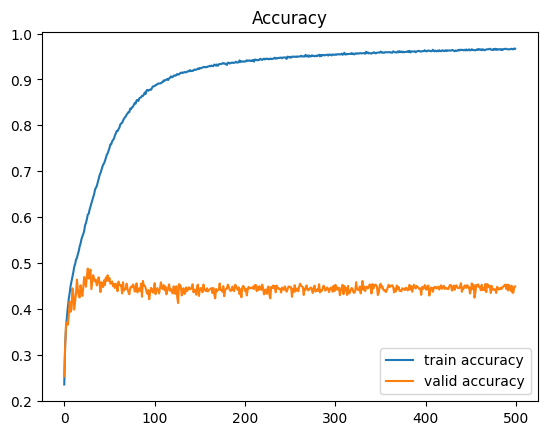

In [11]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()